# IDR Drop

Implements batch tasks used for IDR drops.

In [4]:
import pandas as pd
import numpy as np
import cx_Oracle
import db_connect
import IDRdrop
import json
import os
print('imported modules successfully.')

imported modules successfully.


## Show downloaded files from EPO portal

Here *filepath* is a directory containing downloaded EPO files. Code will print 20 most recent files.

In [5]:
readpath = 'C:\\Users\\wb5888\\Downloads'

myfiles = IDRdrop.show_dir(readpath, 20)
print(myfiles)

files found in dir:  C:\Users\wb5888\Downloads
                                                files                time
0   eversource_a84bbc57-451b-4abb-b50b-64da4594a2a... 2020-03-05 10:56:29
1   eversource_1aca0a86-6edb-4fc5-b942-a09f4902e9a... 2020-03-05 09:05:58
2   eversource_1aca0a86-6edb-4fc5-b942-a09f4902e9a... 2020-03-05 09:05:35
3   eversource_1aca0a86-6edb-4fc5-b942-a09f4902e9a... 2020-03-05 09:05:02
4   eversource_1aca0a86-6edb-4fc5-b942-a09f4902e9a... 2020-03-05 09:04:15
5   eversource_1aca0a86-6edb-4fc5-b942-a09f4902e9a... 2020-03-05 09:03:46
6   eversource_1aca0a86-6edb-4fc5-b942-a09f4902e9a... 2020-03-05 09:03:20
7   ngrid_a7a8bb2a-c571-452b-b683-7e889e595a15_1bc... 2020-03-05 08:20:51
8   ngrid_fb71395c-7068-4aec-8680-cf7fdb32c251_295... 2020-03-04 09:35:38
9   eversource_a3a27832-12c8-4cc5-b07d-9bf2b89fdff... 2020-03-03 13:36:09
10  eversource_a3a27832-12c8-4cc5-b07d-9bf2b89fdff... 2020-03-03 13:34:39
11  DirectEnergyBusiness_HartsRestaurant_03032020.... 2020-03-03 

Choose files to split into Raw IDR files.

In [6]:
index = [0]

splitfiles = list(myfiles.files[index])
print(splitfiles)

['eversource_a84bbc57-451b-4abb-b50b-64da4594a2a3_9eb4d418_hourlycsv.csv']


## Batch process downloaded EPO files into Raw IDRs

In [7]:
readpath = 'C:\\Users\\wb5888\\Downloads'
writepath = 'C:\\Users\\wb5888\\Documents\\la-tools-test\\IDR_Drop\\Raw_IDR'
utility = 'COMELEC'
accts = None
error_log = []

for file in splitfiles:
    try:
        os.chdir(readpath)
        filedf = pd.read_csv(file, sep = ",", header = 0)
    
        IDRdrop.raw_split(filedf, readpath, writepath, utility, accts)
        print('success, file: ', file)
        
    except:
        error_log = error_log.append(file)
        print('error, file: ', file)

found 3 accounts.
COMELEC_13037480061_IDR_RAW.csv  written.
COMELEC_16272550027_IDR_RAW.csv  written.
COMELEC_16634050021_IDR_RAW.csv  written.
success, file:  eversource_a84bbc57-451b-4abb-b50b-64da4594a2a3_9eb4d418_hourlycsv.csv


## Show Raw IDR files based on utility

Here *rawpath* is directory containing Raw IDRs - 25 most recent will be shown.

In [8]:
rawfiles = IDRdrop.show_dir(writepath, 25)
print(rawfiles)

files found in dir:  C:\Users\wb5888\Documents\la-tools-test\IDR_Drop\Raw_IDR
                                    files                time
0         COMELEC_16634050021_IDR_RAW.csv 2020-03-05 10:57:34
1         COMELEC_16272550027_IDR_RAW.csv 2020-03-05 10:57:34
2         COMELEC_13037480061_IDR_RAW.csv 2020-03-05 10:57:33
3            BECO_29468480016_IDR_RAW.csv 2020-03-05 09:08:15
4            BECO_29468590012_IDR_RAW.csv 2020-03-05 09:08:15
5            BECO_29468600019_IDR_RAW.csv 2020-03-05 09:08:15
6            BECO_29468610018_IDR_RAW.csv 2020-03-05 09:08:15
7            BECO_29468620017_IDR_RAW.csv 2020-03-05 09:08:15
8            BECO_29468640015_IDR_RAW.csv 2020-03-05 09:08:15
9            BECO_29477500010_IDR_RAW.csv 2020-03-05 09:08:15
10           BECO_29477510019_IDR_RAW.csv 2020-03-05 09:08:15
11           BECO_29477520018_IDR_RAW.csv 2020-03-05 09:08:15
12           BECO_29477530017_IDR_RAW.csv 2020-03-05 09:08:15
13           BECO_29468450019_IDR_RAW.csv 2020-03-05 0

Choose Raw IDRs to filter into IDR files.

In [10]:
index = [0]

processfiles = rawfiles.files[:3]
files = list(processfiles)
print('files to process: ')
print(processfiles)

files to process: 
0    COMELEC_16634050021_IDR_RAW.csv
1    COMELEC_16272550027_IDR_RAW.csv
2    COMELEC_13037480061_IDR_RAW.csv
Name: files, dtype: object


## Batch filter Raw IDR into IDR files to be dropped

In [11]:
readpath = 'C:\\Users\\wb5888\\Documents\\la-tools-test\\IDR_Drop\\Raw_IDR'
writepath = 'C:\\Users\\wb5888\\Documents\\la-tools-test\\IDR_Drop\\IDR'
error_log = []

for dropfile in files:

    try:
        IDRdrop.data_drop(dropfile, readpath, writepath)
        print('success, file: ', dropfile)
    
    except:
        try:
            error_log.append(dropfile)
        except:
            pass
    

success, file:  COMELEC_16634050021_IDR_RAW.csv
success, file:  COMELEC_16272550027_IDR_RAW.csv
success, file:  COMELEC_13037480061_IDR_RAW.csv


In [8]:
type(error_log)
error_log

[]

## Change meters to vertical

In [12]:
data_dir = 'C:\\Users\\wb5888\\Documents\\la-tools-test\\IDR_Drop\\IDR'
os.chdir(data_dir)
idr = IDRdrop.show_dir(data_dir, 20)
print(idr)

files found in dir:  C:\Users\wb5888\Documents\la-tools-test\IDR_Drop\IDR
                            files                time
0     COMELEC_16634050021_IDR.csv 2020-03-05 10:57:47
1     COMELEC_16272550027_IDR.csv 2020-03-05 10:57:47
2     COMELEC_13037480061_IDR.csv 2020-03-05 10:57:47
3   BECO_29477600018_IDR_vert.csv 2020-03-05 10:22:56
4   BECO_29468480016_IDR_vert.csv 2020-03-05 10:22:14
5   BECO_29477530017_IDR_vert.csv 2020-03-05 10:21:36
6   BECO_29830120019_IDR_vert.csv 2020-03-05 10:20:47
7   BECO_29468450019_IDR_vert.csv 2020-03-05 10:20:01
8   BECO_29477590011_IDR_vert.csv 2020-03-05 10:19:17
9   BECO_29477580012_IDR_vert.csv 2020-03-05 10:18:18
10  BECO_29477570013_IDR_vert.csv 2020-03-05 10:17:22
11  BECO_29477560014_IDR_vert.csv 2020-03-05 10:16:35
12  BECO_29477540016_IDR_vert.csv 2020-03-05 10:15:30
13  BECO_29477550015_IDR_vert.csv 2020-03-05 10:14:38
14  BECO_29477520018_IDR_vert.csv 2020-03-05 10:13:41
15  BECO_29477510019_IDR_vert.csv 2020-03-05 10:12:52
16  BECO

In [13]:
myfiles = idr.files[:3]
for f in myfiles:
    IDRdrop.hor_to_vert(f)

transformed and wrote COMELEC_16634050021_IDR.csv to COMELEC_16634050021_IDR_vert.csv.
transformed and wrote COMELEC_16272550027_IDR.csv to COMELEC_16272550027_IDR_vert.csv.
transformed and wrote COMELEC_13037480061_IDR.csv to COMELEC_13037480061_IDR_vert.csv.


## Plot data

In [14]:
idr = IDRdrop.show_dir(data_dir, 10)
print(idr)

files found in dir:  C:\Users\wb5888\Documents\la-tools-test\IDR_Drop\IDR
                              files                time
0  COMELEC_13037480061_IDR_vert.csv 2020-03-05 10:57:57
1  COMELEC_16272550027_IDR_vert.csv 2020-03-05 10:57:56
2  COMELEC_16634050021_IDR_vert.csv 2020-03-05 10:57:56
3       COMELEC_13037480061_IDR.csv 2020-03-05 10:57:47
4       COMELEC_16272550027_IDR.csv 2020-03-05 10:57:47
5       COMELEC_16634050021_IDR.csv 2020-03-05 10:57:47
6     BECO_29477600018_IDR_vert.csv 2020-03-05 10:22:56
7     BECO_29468480016_IDR_vert.csv 2020-03-05 10:22:14
8     BECO_29477530017_IDR_vert.csv 2020-03-05 10:21:36
9     BECO_29830120019_IDR_vert.csv 2020-03-05 10:20:47


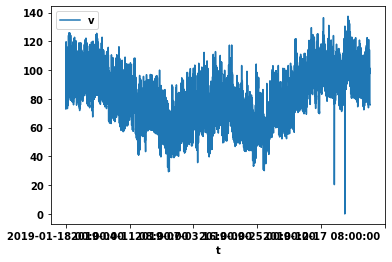

In [17]:
idr_df = pd.read_csv(idr.files[2], names = ['t', 'v'])
idr_df.set_index('t', inplace = True, drop = True)
idr_df.plot(y = 'v')

## Generate/get scalar, get tags

## Create datasource

## EWX API